## Project: Analyzing Historical StockRevenue Data and Building a Dashboard

In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go 
from plotly.subplots import make_subplots 

In [2]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

## Graphing Function


In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Using yfinance to Extract Stock Data


In [4]:
import yfinance as yf

# Define the ticker symbol for Tesla
ticker_symbol = "TSLA"

# Create a ticker object using the ticker symbol
tesla_ticker = yf.Ticker(ticker_symbol)

# Print the ticker object (optional)
print(tesla_ticker) 

yfinance.Ticker object <TSLA>


In [5]:
import yfinance as yf

# Define the ticker symbol for Tesla
ticker_symbol = "TSLA"

# Create a ticker object using the ticker symbol
tesla_ticker = yf.Ticker(ticker_symbol)

# Extract stock data using the history function with period="max"
tesla_data = tesla_ticker.history(period="max")

# Print the first few rows of the DataFrame
print(tesla_data.head()) 


                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


In [6]:
import yfinance as yf

# Define the ticker symbol for Tesla
ticker_symbol = "TSLA"

# Create a ticker object using the ticker symbol
tesla_ticker = yf.Ticker(ticker_symbol)

# Extract stock data using the history function with period="max"
tesla_data = tesla_ticker.history(period="max")

# Reset the index 
tesla_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(tesla_data.head()) 


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Using Webscraping to Extract Tesla Revenue Data


Using the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm and saving the text of the response as a variable named html_data.


In [7]:
import requests

# Define the URL of the webpage containing Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL and store the response
response = requests.get(url)

# Check for successful response
if response.status_code == 200:
  # Extract the HTML content from the response
  html_data = response.text
  print("Successfully downloaded HTML data.")
else:
  print(f"Failed to download webpage. Status code: {response.status_code}")

Successfully downloaded HTML data.


Parsing the html data using beautiful_soup using parser i.e html5lib or html.parser. 


In [8]:
import requests
from bs4 import BeautifulSoup

# Define the URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check for successful response
if response.status_code == 200:
    # Extract the HTML content from the response
    html_data = response.text

    # Parse the HTML content using BeautifulSoup with 'html.parser'
    soup = BeautifulSoup(html_data, 'html.parser') 

    # Print the parsed HTML content (optional)
    # print(soup.prettify()) 

else:
    print(f"Failed to download webpage. Status code: {response.status_code}")

Using BeautifulSoup or the read_html function for extracting the table with Tesla Revenue and storing it into a dataframe named tesla_revenue.


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check for successful response
if response.status_code == 200:
    # Extract the HTML content from the response
    html_data = response.text

    # Parse the HTML content using BeautifulSoup with 'html.parser'
    soup = BeautifulSoup(html_data, 'html.parser')

    # Use pandas read_html to extract the table
    tesla_revenue = pd.read_html(str(soup), match='Tesla Quarterly Revenue', flavor='bs4')[0]

    # Rename columns to 'Date' and 'Revenue'
    tesla_revenue.columns = ['Date', 'Revenue']

    # Display the first 5 rows
    print(tesla_revenue.head())

else:
    print(f"Failed to download webpage. Status code: {response.status_code}")

         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


Removing the comma and dollar sign from the Revenue column. 


In [10]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Siddhesh Kumbhar\AppData\Local\Temp\ipykernel_7772\349343550.py:1: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")


Removing an null or empty strings in the Revenue column.


In [11]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check for successful response
if response.status_code == 200:
    # Extract the HTML content from the response
    html_data = response.text

    # Parse the HTML content using BeautifulSoup with 'html.parser'
    soup = BeautifulSoup(html_data, 'html.parser')

    # Use pandas read_html to extract the table
    tesla_revenue = pd.read_html(str(soup), match='Tesla Quarterly Revenue', flavor='bs4')[0]

    # Rename columns to 'Date' and 'Revenue'
    tesla_revenue.columns = ['Date', 'Revenue']

    # Display the last 5 rows
    print(tesla_revenue.tail())

else:
    print(f"Failed to download webpage. Status code: {response.status_code}")

          Date Revenue
49  2010-06-30     $28
50  2010-03-31     $21
51  2009-12-31     NaN
52  2009-09-30     $46
53  2009-06-30     $27


## Using yfinance to Extract Stock Data 


In [13]:
import yfinance as yf

# Define the ticker symbol for GameStop
ticker_symbol = "GME"

# Create a ticker object using the ticker symbol
gme_ticker = yf.Ticker(ticker_symbol)

# Print the ticker object (optional)
print(gme_ticker)

yfinance.Ticker object <GME>


In [14]:
import yfinance as yf

# Define the ticker symbol for GameStop
ticker_symbol = "GME"

# Create a ticker object using the ticker symbol
gme_ticker = yf.Ticker(ticker_symbol)

# Extract stock data using the history function with period="max"
gme_data = gme_ticker.history(period="max")

# Print the first few rows of the DataFrame
print(gme_data.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


In [15]:
import yfinance as yf

# Define the ticker symbol for GameStop
ticker_symbol = "GME"

# Create a ticker object using the ticker symbol
gme_ticker = yf.Ticker(ticker_symbol)

# Extract stock data using the history function with period="max"
gme_data = gme_ticker.history(period="max")

# Reset the index 
gme_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(gme_data.head()) 

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Using Webscraping to Extract GME Revenue Data 


Using the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. and saving the text of the response as a variable named html_data_2.


In [16]:
import requests

# Define the URL of the webpage containing GME revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL and store the response
response = requests.get(url)

# Check for successful response
if response.status_code == 200:
  # Extract the HTML content from the response
  html_data_2 = response.text
  print("Successfully downloaded HTML data.")
else:
  print(f"Failed to download webpage. Status code: {response.status_code}")

Successfully downloaded HTML data.


Parsing the html data using beautiful_soup using parser i.e html5lib or html.parser. 


In [17]:
import requests
from bs4 import BeautifulSoup

# Define the URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check for successful response
if response.status_code == 200:
    # Extract the HTML content from the response
    html_data_2 = response.text

    # Parse the HTML content using BeautifulSoup with 'html.parser'
    soup = BeautifulSoup(html_data_2, 'html.parser') 

    # Print the parsed HTML content (optional)
    # print(soup.prettify()) 

else:
    print(f"Failed to download webpage. Status code: {response.status_code}")

Using BeautifulSoup or the read_html function to extract the table with GameStop Revenue and store it into a dataframe named gme_revenue. 


In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check for successful response
if response.status_code == 200:
    # Extract the HTML content from the response
    html_data_2 = response.text

    # Parse the HTML content using BeautifulSoup with 'html.parser'
    soup = BeautifulSoup(html_data_2, 'html.parser')

    # Use pandas read_html to extract the table
    gme_revenue = pd.read_html(str(soup), match='GameStop Quarterly Revenue', flavor='bs4')[0]

    # Rename columns to 'Date' and 'Revenue'
    gme_revenue.columns = ['Date', 'Revenue']

    # Remove commas and dollar signs from the 'Revenue' column
    gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '')

    # Display the first 5 rows
    print(gme_revenue.head())

else:
    print(f"Failed to download webpage. Status code: {response.status_code}")

         Date Revenue
0  2020-04-30    1021
1  2020-01-31    2194
2  2019-10-31    1439
3  2019-07-31    1286
4  2019-04-30    1548


Last five rows of the gme_revenue dataframe.


In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check for successful response
if response.status_code == 200:
    # Extract the HTML content from the response
    html_data_2 = response.text

    # Parse the HTML content using BeautifulSoup with 'html.parser'
    soup = BeautifulSoup(html_data_2, 'html.parser')

    # Use pandas read_html to extract the table
    gme_revenue = pd.read_html(str(soup), match='GameStop Quarterly Revenue', flavor='bs4')[0]

    # Rename columns to 'Date' and 'Revenue'
    gme_revenue.columns = ['Date', 'Revenue']

    # Remove '$' and ',' from the 'Revenue' column
    gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)

    # Display the last 5 rows
    print(gme_revenue.tail()) 

else:
    print(f"Failed to download webpage. Status code: {response.status_code}")

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


## Plotting Tesla Stock Graph 


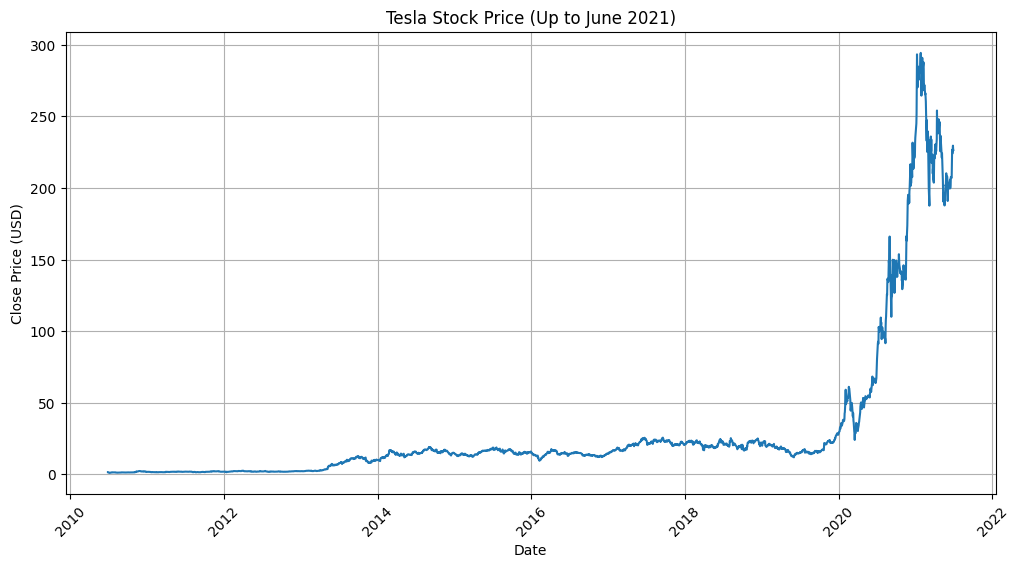

In [20]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol for Tesla
ticker_symbol = "TSLA"

# Create a ticker object using the ticker symbol
tesla_ticker = yf.Ticker(ticker_symbol)

# Extract stock data using the history function with period="max"
tesla_data = tesla_ticker.history(period="max")

# Reset the index 
tesla_data.reset_index(inplace=True)

# Filter data up to June 2021
tesla_data_filtered = tesla_data[tesla_data['Date'] <= '2021-06-30']

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(tesla_data_filtered['Date'], tesla_data_filtered['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('Tesla Stock Price (Up to June 2021)')
plt.grid(True)
plt.xticks(rotation=45) 
plt.show() 

## Plotting GameStop Stock Graph  


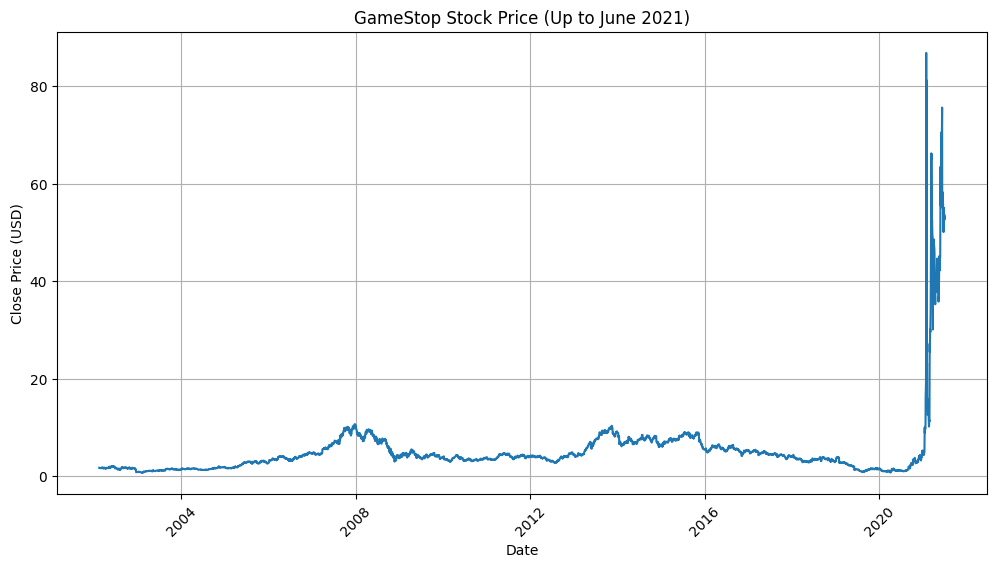

In [21]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, company_name):
    """
    Plots the stock price and revenue of a given company.

    Args:
        stock_data: DataFrame containing stock data.
        revenue_data: DataFrame containing revenue data.
        company_name: Name of the company (e.g., "GameStop", "Tesla").

    """
    # Filter data up to June 2021
    stock_data_filtered = stock_data[stock_data['Date'] <= '2021-06-30']

    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data_filtered['Date'], stock_data_filtered['Close'])
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.title(f'{company_name} Stock Price (Up to June 2021)')
    plt.grid(True)
    plt.xticks(rotation=45) 
    plt.show()

# Define the ticker symbol for GameStop
ticker_symbol = "GME"

# Create a ticker object using the ticker symbol
gme_ticker = yf.Ticker(ticker_symbol)

# Extract stock data using the history function with period="max"
gme_data = gme_ticker.history(period="max")

# Reset the index 
gme_data.reset_index(inplace=True)

# Call the make_graph function
make_graph(gme_data, gme_revenue, 'GameStop') 